<p style="font-family: Arial; font-size:3.5em; color:purple; font-style:bold">
Źródła energii elektrycznej w Polsce</p><br>


Źródło danych: *World Development Indicators* https://www.kaggle.com/worldbank/world-development-indicators

W pracy tej dokonam analizy źródeł energii elektrycznej w Polsce. Porównam także dane dla Polski z danymi na świecie.

# Eksploracja danych

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
dane = pd.read_csv('world-development-indicators/Indicators.csv')
dane.shape

(5656458, 6)

Mamy bardzo duży zbiór danych. 

### Co zawiera zbiór danych?

In [4]:
dane.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Interesują nas kraje i wskaźniki w naszych danych.

## Polska

### Czy wśród tych krajów znajduje się Polska?

In [5]:
kraje = dane['CountryName'].unique().tolist()
len(kraje)

247

In [6]:
'Poland' in kraje

True

### Ile jest wskaźników dla Polski?

In [113]:
dane_dla_polski = dane[dane['CountryName'].str.contains('Poland')]
wskazniki_dla_polski = dane_dla_polski['IndicatorName'].unique().tolist()
len(wskazniki_dla_polski)

980

Usuńmy niepotrzebne kolumny.

In [114]:
del dane_dla_polski['CountryName']
del dane_dla_polski['CountryCode']
del dane_dla_polski['IndicatorCode']

### Dla jakich lat mamy dane?

In [116]:
dane_dla_polski.groupby('Year').count()

,IndicatorName,Value
Year,,
1960,96,96
1961,109,109
1962,113,113
1963,116,116
1964,96,96
1965,102,102
1966,96,96
1967,100,100
1968,96,96


Mamy zatem dane z przedziału czasu od 1960 roku do 2015 roku. Liczba wskaźników dla poszczególnych lat jest różna. Im dalej w przeszłość tym mniej danych. Także najnowsze lata 2014-2015 okazują się mieć wiele brakujących wartości. 

### Czy w zbiorze są interesujące nas wskaźniki?

In [208]:
jest_produkcja_elektryczna_wpolsce = dane_dla_polski['IndicatorName'].str.contains('[Ee]lectricity production')

dane_elektrycznosc = dane_dla_polski[jest_produkcja_elektryczna_wpolsce]
wskazniki_elektrycznosc = dane_elektrycznosc['IndicatorName'].unique().tolist()
wskazniki_elektrycznosc

['Electricity production from coal sources (% of total)',
 'Electricity production from hydroelectric sources (% of total)',
 'Electricity production from natural gas sources (% of total)',
 'Electricity production from nuclear sources (% of total)',
 'Electricity production from oil sources (% of total)',
 'Electricity production from oil, gas and coal sources (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (kWh)']

Skupmy się na obecnych czasach i weźmy dane dla aktualnego stulecia.

In [198]:
jest_powyzej_roku_2000 = dane_elektrycznosc['Year'] >= 2000
dane_elektrycznosc_najnowsze = dane_elektrycznosc[jest_powyzej_roku_2000]

Przkształćmy powyższe dane tak, aby można było je odpowiednia zobrazować.

In [122]:
temp1 = dane_elektrycznosc_najnowsze.set_index('Year')
temp1.head()

,IndicatorName,Value
Year,,
2000,Electricity production from coal sources (% of...,96.153631
2000,Electricity production from hydroelectric sour...,1.470937
2000,Electricity production from natural gas source...,0.648162
2000,Electricity production from nuclear sources (%...,0.000000
2000,Electricity production from oil sources (% of ...,1.338232


In [123]:
temp2 = temp1.groupby('IndicatorName')
dane_koncowe = pd.DataFrame()
for name, group in temp2:
    dane_koncowe[name] = group['Value']
dane_koncowe.tail()

,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),"Electricity production from oil, gas and coal sources (% of total)","Electricity production from renewable sources, excluding hydroelectric (% of total)","Electricity production from renewable sources, excluding hydroelectric (kWh)"
Year,,,,,,,,
2009,89.249012,1.571588,3.167660,0.0,1.801867,94.218540,4.170830,6.303000e+09
2010,88.130932,1.858819,3.054320,0.0,1.840995,93.026246,5.072284,7.968000e+09
2011,86.829167,1.429027,3.568582,0.0,1.503819,91.901568,6.624652,1.080600e+10
2012,84.388199,1.259655,3.871103,0.0,1.264602,89.523904,9.178102,1.484200e+10
2013,85.323010,1.488139,3.126373,0.0,1.092766,89.542149,8.934324,1.464300e+10


### Czy nasze dane są odpowiedniej jakości?

In [124]:
dane_koncowe.describe()

,Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),"Electricity production from oil, gas and coal sources (% of total)","Electricity production from renewable sources, excluding hydroelectric (% of total)","Electricity production from renewable sources, excluding hydroelectric (kWh)"
count,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,1.400000e+01
mean,91.175458,1.452378,2.547496,0.0,1.611769,95.334723,3.079490,4.909571e+09
std,3.837581,0.181646,1.003595,0.0,0.229233,3.153109,3.213562,5.234083e+09
min,84.388199,1.113933,0.648162,0.0,1.092766,89.523904,0.157850,2.260000e+08
25%,88.410452,1.371346,1.727668,0.0,1.537173,93.324320,0.452216,6.825000e+08
50%,92.044874,1.449982,2.941920,0.0,1.667945,96.808852,1.668854,2.663500e+09
75%,94.407973,1.550726,3.157338,0.0,1.771451,97.759113,4.846920,7.551750e+09
max,96.153631,1.858819,3.871103,0.0,1.840995,98.309435,9.178102,1.484200e+10


In [125]:
dane_koncowe.isnull().any()

Electricity production from coal sources (% of total)                                  False
Electricity production from hydroelectric sources (% of total)                         False
Electricity production from natural gas sources (% of total)                           False
Electricity production from nuclear sources (% of total)                               False
Electricity production from oil sources (% of total)                                   False
Electricity production from oil, gas and coal sources (% of total)                     False
Electricity production from renewable sources, excluding hydroelectric (% of total)    False
Electricity production from renewable sources, excluding hydroelectric (kWh)           False
dtype: bool

## Świat

### Jakie są dane dla innych krajów?

Postępujemy analogicznie jak wcześniej.

In [234]:
zrodla_odnawialne_na_swiecie = dane['IndicatorName'].str.contains('[Ee]lectricity production.*hydro.*%')

dane_swiat = dane[zrodla_odnawialne_na_swiecie]
dane_swiat.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
498,Euro area,EMU,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1960,38.725424
503,Euro area,EMU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.615391
816,European Union,EUU,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1960,27.771823
821,European Union,EUU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.352812
1108,High income,HIC,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1960,27.405353


In [301]:
jest_ponad_2010 = dane_swiat['Year'] >= 2010
dane_swiat_najnowsze = dane_swiat[jest_ponad_2010]

In [302]:
del dane_swiat_najnowsze['CountryCode']
del dane_swiat_najnowsze['IndicatorCode']

### Jaki mamy zestaw wskaźników?

In [303]:
wskazniki_odnawialne = dane_swiat['IndicatorName'].unique().tolist()
wskazniki_odnawialne

['Electricity production from hydroelectric sources (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)']

### Jaki procent energii elektrycznej jest wytwarzany z odnawialnych źródeł energii?

In [304]:
dane_swiat_najnowsze.tail()

,CountryName,IndicatorName,Year,Value
5522658,Turkey,"Electricity production from renewable sources,...",2013,3.998225
5526706,United Kingdom,Electricity production from hydroelectric sour...,2013,1.334573
5526711,United Kingdom,"Electricity production from renewable sources,...",2013,13.595065
5527360,United States,Electricity production from hydroelectric sour...,2013,6.348186
5527365,United States,"Electricity production from renewable sources,...",2013,6.177054


In [306]:
dane_swiat_najnowsze[['CountryName', 'Year']].groupby('Year').count()

,CountryName
Year,
2010,332
2011,332
2012,332
2013,68


Jak widać dla roku 2013 wielu krajom brakuje wartości. Weźmy zatem dane dla roku 2012.

In [311]:
jest_rok_2012 = dane_swiat_najnowsze['Year'] == 2012

dane_swiat_2012 = dane_swiat_najnowsze[jest_rok_2012]
del dane_swiat_2012['Year']

dane_swiat_2012.head()

,CountryName,IndicatorName,Value
5202389,Arab World,Electricity production from hydroelectric sour...,3.305623
5202394,Arab World,"Electricity production from renewable sources,...",0.251099
5203362,Central Europe and the Baltics,Electricity production from hydroelectric sour...,7.837370
5203367,Central Europe and the Baltics,"Electricity production from renewable sources,...",7.089450
5203957,East Asia & Pacific (all income levels),Electricity production from hydroelectric sour...,13.878517


In [321]:
dane_swiat_2012.isnull().any()

CountryName      False
IndicatorName    False
Value            False
dtype: bool

In [322]:
temp4 = dane_swiat_2012.groupby('CountryName')

In [369]:
d = dict()
for kraj, grupa in temp4:
    d[kraj] = grupa['Value'].sum()

In [370]:
del d['OECD members']
del d['Sub-Saharan Africa (all income levels)']
del d['Fragile and conflict affected situations']
del d['Sub-Saharan Africa (developing only)']
del d['Middle East & North Africa (all income levels)']
del d['Euro area']
del d['South Africa']
del d['Least developed countries: UN classification']
del d['Latin America & Caribbean (developing only)']
del d['Latin America & Caribbean (all income levels)']
del d['High income: OECD']
del d['Upper middle income']
del d['High income']
del d['Middle income']
del d['East Asia & Pacific (developing only)']
del d['East Asia & Pacific (all income levels)']
del d['European Union']
del d['Middle East & North Africa (developing only)']
del d['Other small states']
del d['Central Europe and the Baltics']
del d['Europe & Central Asia (all income levels)']
del d['Low & middle income']
del d['North America']
del d['Lower middle income']
del d['High income: nonOECD']
del d['Europe & Central Asia (developing only)']
del d['Heavily indebted poor countries (HIPC)']

print('Ilość krajów: ',len(d))
print(d.keys())

Ilość krajów:  139
dict_keys(['Portugal', 'Panama', 'World', 'Belarus', 'Kosovo', 'Albania', 'Algeria', 'Peru', 'Serbia', 'Cameroon', 'Sweden', 'Guatemala', 'Uzbekistan', 'Jordan', 'Arab World', 'Tajikistan', 'Kenya', 'Australia', 'Brunei Darussalam', 'Gabon', 'Honduras', 'Finland', 'Pakistan', 'France', 'Iran, Islamic Rep.', 'Egypt, Arab Rep.', 'Georgia', 'Israel', 'Singapore', 'Nepal', 'Mozambique', 'Cyprus', 'Philippines', 'Colombia', 'Kazakhstan', 'Nigeria', 'Cuba', "Cote d'Ivoire", 'New Zealand', 'Benin', 'Ireland', 'United Arab Emirates', 'Belgium', 'Croatia', 'Korea, Dem. Rep.', 'Congo, Rep.', 'Bangladesh', 'Estonia', 'Germany', 'Kyrgyz Republic', 'Dominican Republic', 'Hungary', 'Slovenia', 'El Salvador', 'Luxembourg', 'Botswana', 'Macedonia, FYR', 'Senegal', 'Morocco', 'Moldova', 'Uruguay', 'Saudi Arabia', 'Nicaragua', 'Montenegro', 'Czech Republic', 'Chile', 'Congo, Dem. Rep.', 'Ghana', 'Korea, Rep.', 'Switzerland', 'Mauritius', 'Venezuela, RB', 'United States', 'Myanmar', 'S

Mamy dane dla 139 krajów.

In [385]:
dane_koncowe_swiat_2012 = pd.Series(d)
dane_koncowe_swiat_2012

Albania                   100.000000
Algeria                     1.083680
Angola                     70.906823
Arab World                  3.556722
Argentina                  23.769069
Armenia                    28.944749
Australia                   9.632600
Austria                    74.544925
Azerbaijan                  7.921524
Bahrain                     0.000000
Bangladesh                  1.584453
Belarus                     0.555213
Belgium                    12.788465
Benin                       0.613497
Bolivia                    33.755384
Bosnia and Herzegovina     29.931828
Botswana                    0.000000
Brazil                     82.471415
Brunei Darussalam           0.050891
Bulgaria                   11.436484
Cambodia                   37.656904
Cameroon                   73.040305
Canada                     63.248457
Chile                      36.445356
China                      20.041117
Colombia                   79.551470
Congo, Dem. Rep.           99.560633
C

### Czy mamy dane dobrej jakości?

In [343]:
print('min ', dane_koncowe_swiat_2012.min(), '\nmax ', dane_koncowe_swiat_2012.max())

min  0.0 
max  100.0


In [344]:
dane_koncowe_swiat_2012.isnull().any()

False

In [386]:
dane_koncowe_swiat_2012.describe()

count    139.000000
mean      32.771794
std       31.862983
min        0.000000
25%        7.785567
50%       20.700751
75%       59.723742
max      100.000000
dtype: float64

In [387]:
dane_koncowe_swiat_2012['Poland']

10.437756244163982

# Wizualizacja danych

In [354]:
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.path as path

### Jak wygląda produkcja energii w Polsce?

In [195]:
rok = dane_koncowe.index
etykiety = ('Węgiel', 'Hydroelektryka', 'Gaz ziemny', 'Odnawialne źródła energii (bez hydroelektrycznych)', 'Ropa')
kolory = ('black', 'blue', 'red', 'green', 'brown')

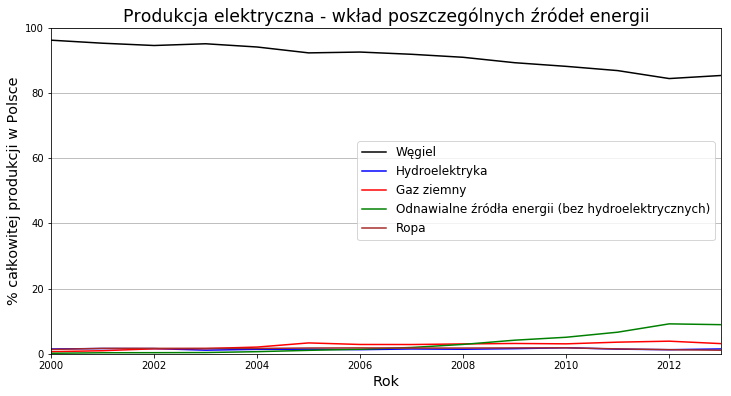

In [382]:
fig, ax = plt.subplots(figsize=(12,6))

for i, e, k in zip((0, 1, 2, 6, 4), etykiety, kolory):
    w = wskazniki_elektrycznosc[i]
    ax.plot(rok, dane_koncowe[w], color=k, label=e)

ax.set_title('Produkcja elektryczna - wkład poszczególnych źródeł energii', fontsize='xx-large')
ax.set_xlabel('Rok', fontsize='x-large')
ax.set_ylabel('% całkowitej produkcji w Polsce', fontsize='x-large')

ax.grid(axis='y')
ax.legend(loc=0, fontsize='large')
ax.axis([rok[0], rok[-1], 0, 100])

plt.savefig('produkcja.png')

Ponieważ wkład węgla jest bardzo duży, zobaczmy jak wygląda produkcja tylko dla pozostałych źródeł.

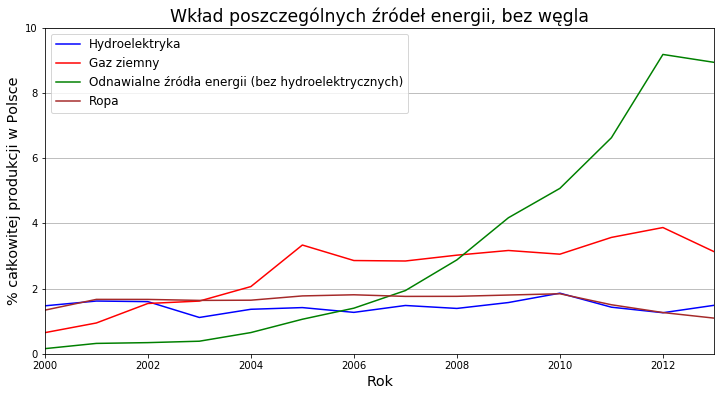

In [381]:
fig, ax = plt.subplots(figsize=(12,6))

for i, e, k in zip((1, 2, 6, 4), etykiety[1:], kolory[1:]):
    w = wskazniki_elektrycznosc[i]
    ax.plot(rok, dane_koncowe[w], color=k, label=e)

ax.set_title('Wkład poszczególnych źródeł energii, bez węgla', fontsize='xx-large')
ax.set_xlabel('Rok', fontsize='x-large')
ax.set_ylabel('% całkowitej produkcji w Polsce', fontsize='x-large')

ax.grid(axis='y')
ax.legend(loc=0, fontsize='large')
ax.axis([rok[0], rok[-1], 0, 10])

plt.savefig('produkcja-bez-wegla.png')

Widzimy, że wkład energii produkowanej z odnawialnych źródeł stale rośnie.

### Jaki wygląda wkład odnawialnych źródeł energii dla Polski na tle innych krajów?

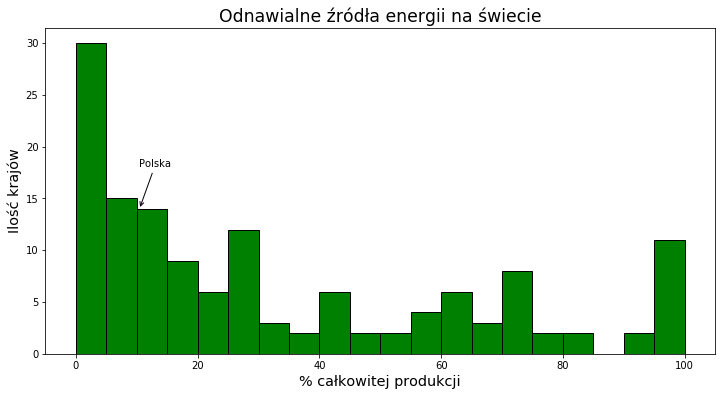

In [383]:
fig, ax = plt.subplots(figsize=(12, 6))

N, bins, patches = ax.hist(dane_koncowe_swiat_2012, bins=20);
for patch in patches:
    patch.set_facecolor('green')
    patch.set_edgecolor('black')

ax.annotate("Polska",
        xy=(dane_koncowe_swiat_2012['Poland'], 14), xycoords='data',
        xytext=(dane_koncowe_swiat_2012['Poland'], 18), textcoords='data',
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"),
        )

ax.set_title('Odnawialne źródła energii na świecie', fontsize='xx-large')
ax.set_xlabel('% całkowitej produkcji', fontsize='x-large')
ax.set_ylabel('Ilość krajów', fontsize='x-large')

plt.savefig('produkcja-na-swiecie.png')

Polsce dużo brakuje do czołowych miejsc. Widać jednak, że nie znajduje się także na samym tyle.